[View in Colaboratory](https://colab.research.google.com/github/VictorPetch/MachineLearning/blob/master/RegLin_Multi_Variable.ipynb)

In [1]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "50_Startups.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

50_Startups.csv  Salary_Data.csv


In [8]:
import pandas as pd

def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

my_data_set = load_data()

my_data_set.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
my_data_set.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [0]:
# Misturando os dados 

from sklearn.utils import shuffle

shuffle(my_data_set)

# Separando os dados para as variáveis independentes e para variável dependete 

X = my_data_set.iloc[:,:-1].values # pega todas as colunas e exclui a última
y = my_data_set.iloc[:, 4].values # pega só quinta coluna 

X = X[:,[0,1,2]] # escolhendo colunas específicas de X


# Dividindo entre arquivos de treinamento e teste 
# Split the data into training/testing sets
X_train = X[:-25]
X_test = X[-25:]

# Split the targets into training/testing sets
y_train = y[:-25]
y_test = y[-25:]

In [19]:
print(X[0:6,:])

[[165349.2 136897.8 471784.1]
 [162597.7 151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34 91391.77 366168.42]
 [131876.9 99814.71 362861.36]]


In [20]:
# Preparando para a regressão 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.81033613 -0.09107026  0.01997559]
Mean squared error: 105054446.02
Variance score: 0.82


In [21]:
print("X_train") 
print(X_train)
print("X_test") 
print(X_test)
print(y_pred)
print(y_test)

X_train
[[165349.2 136897.8 471784.1]
 [162597.7 151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34 91391.77 366168.42]
 [131876.9 99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96 91790.61 249744.55]
 [93863.75 127320.38 249839.44]
 [91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [78013.11 121597.55 264346.06]
 [94657.16 145077.58 282574.31]
 [91749.16 114175.79 294919.57]
 [86419.7 153514.11 0.0]
 [76253.86 113867.3 298664.47]
 [78389.47 153773.43 299737.29]
 [73994.56 122782.75 303319.26]
 [67532.53 105751.03 304768.73]
 [77044.01 99281.34 140574.81]]
X_test
[[64664.71 139553.16 137962.62]
 [75328.87 144135.98 134050.07]
 [72107.6 127864.55 353183.81]
 [66051.52 182645.56 118148.2]
 [65605.48 153032.06 107138.38]
 [61994.48 115641.28 91131.24

Shuffle ajuda na hora de preparar os dados, mas atrapalha na hora de mostrá-los

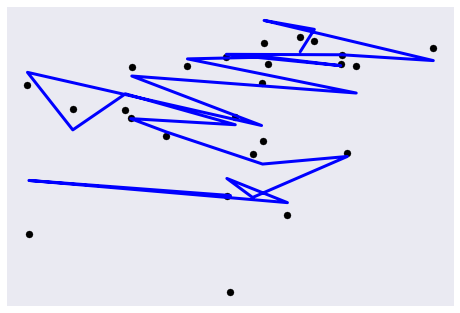

In [22]:
# Plot outputs
plt.scatter(X_test[:,1], y_test,  color='black')
plt.plot(X_test[:,1], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()